
#### `Hetal Khanapure`
 - M.No : +91-9948251997
 - Email ID : hetu.parmar@gmail.com

# `Part 2 : Creating a sentiment classification engine.`

# Text preprocessing and Model building and evaluating 

In [61]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

## Importing and preprocesing the data

In [62]:
df_merged = pd.read_excel('merged_dataset_model.xlsx')

In [63]:
df_merged.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,...,title,also_buy,brand,feature,details,price,category_new,new_rank,also_view_new,also_view_brand
0,1,0,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,0,NEGATIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]
1,4,0,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]
2,3,0,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,0,NEGATIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]
3,5,1,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]
4,3,0,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]


In [64]:
# no of records
len(df_merged)

63838

In [65]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63838 entries, 0 to 63837
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           63838 non-null  int64  
 1   verified          63838 non-null  int64  
 2   reviewerID        63838 non-null  object 
 3   asin              63838 non-null  object 
 4   reviewerName      63829 non-null  object 
 5   reviewText        63838 non-null  object 
 6   summary           63821 non-null  object 
 7   unixReviewTime    63838 non-null  int64  
 8   vote              63838 non-null  int64  
 9   review_sentiment  63838 non-null  object 
 10  Date&Time         63838 non-null  object 
 11  description       63838 non-null  object 
 12  title             63838 non-null  object 
 13  also_buy          63838 non-null  object 
 14  brand             63772 non-null  object 
 15  feature           63838 non-null  object 
 16  details           63838 non-null  object

In [66]:
# counting positive and negative instances
pos_neg = df_merged.review_sentiment.value_counts()
pos_neg

POSITIVE    47677
NEGATIVE    16161
Name: review_sentiment, dtype: int64

In [67]:
print("positive rate is about {0}%".format(round((pos_neg[0]/float(pos_neg[0]+pos_neg[1]))*100), 2))

positive rate is about 75%


In [68]:
print("negative rate is about {0}%".format(round((pos_neg[1]/float(pos_neg[0]+pos_neg[1]))*100), 2))

negative rate is about 25%


In [69]:
# mapping labels to 0 and 1
df_merged['review_sentiment'] = df_merged.review_sentiment.map({'POSITIVE':1, 'NEGATIVE':0})

In [70]:
df_merged.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,...,title,also_buy,brand,feature,details,price,category_new,new_rank,also_view_new,also_view_brand
0,1,0,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,0,0,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]
1,4,0,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,0,1,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]
2,3,0,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,0,0,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]
3,5,1,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,0,1,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]
4,3,0,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,0,1,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]


In [71]:
df_reviews = df_merged[["reviewText","review_sentiment"]]

In [72]:
df_reviews.head()

,reviewText,review_sentiment
0,This phone is ugly and heavy and has a terribl...,0
1,I had the Samsung V205 and then I decided to t...,1
2,This is the first Samsung phone I have had and...,0
3,"..and I'm from Europe, where the phones and ne...",1
4,This phone is amazingly small and light for a ...,1


#### Preprocess the text

In [73]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('stop_words_long.txt')]

In [74]:
# remove contraction and make it as normal string 
contractionsMain = {"ain't": "is not", "aren't": "are not","can't": "can not", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def getcontractions(contractionsMain):
    contraction_key = re.compile('(%s)' % '|'.join(contractionsMain.keys()))
    return contractionsMain, contraction_key

contractions, contraction_key = getcontractions(contractionsMain)
def replacecontractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contraction_key.sub(replace, text)




In [75]:

def remove_punctuations(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    
    return text

In [76]:
#function to remove numbers and punctuation marks
puncts_list=['!','@','#','$','%','^','&','*','(',')','-','_','+','=','{','}','[',']',':',';','?','/','\\','|','.','<','>']
def removepuctuationmarks(x):
    x = str(x)
    for punct in puncts_list:
        if punct in x:
            x = x.replace(punct, '')
    return x


In [77]:
# replace charachter appearing for more than twice in any word to single character 
def replace_multiple_characters(text):
        #repeat_pattern = re.compile(r'(\w)\1*')
        repeat_pattern = re.compile(r'(\w)\1{2,}')
        match_substitution = r'\1\1' 
        new_word = repeat_pattern.sub(match_substitution,text) 
        repeat_pattern1 = re.compile(r'(\w)\1{1,}$')
        match_substitution1 = r'\1' 
        new_word = repeat_pattern1.sub(match_substitution1,new_word) 
        return new_word
   

In [78]:
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def preprocessText(document):
     # tokenize into words
         # change sentence to lower case
    document = document.lower()
    words = word_tokenize(document)
    # remove contractions
    words = [ replacecontractions(word) for word in words ]
    
    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    # remove punctuation marks
    
    words=[remove_punctuations(word) for word in words]
    
    words=[replace_multiple_characters(word) for word in words]
    
    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    #apply lemmatization
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    words=[word for word in words if len(word)>2]
    # join words to make sentence
    document = " ".join(words)
    
    return document

In [79]:
df_reviews["reviewText"]=[preprocessText(str(x)) for x in df_reviews["reviewText"]]

<ipython-input-79-bb68621f2fde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews["reviewText"]=[preprocessText(str(x)) for x in df_reviews["reviewText"]]


In [80]:
# convert to X and y
X = df_reviews.reviewText
y = df_reviews.review_sentiment
print(X.shape)
print(y.shape)

(63838,)
(63838,)


In [81]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [82]:
X_train.head()

42130    buy phone mom ago work great like complaints g...
53310                                                 good
23250    happy phone expect meet delivery time responsi...
32825    purchase phone upgrade aka optimus true lte ab...
32157                              gift granddaughter love
Name: reviewText, dtype: object

In [83]:
y_train.head()

42130    1
53310    1
23250    1
32825    1
32157    0
Name: review_sentiment, dtype: int64

In [84]:
# vectorizing the sentences
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [85]:
vect.fit(X_train)

CountVectorizer()

In [86]:
# printing the vocabulary
vect.vocabulary_

{'buy': 3190,
 'phone': 17431,
 'mom': 14969,
 'ago': 547,
 'work': 26831,
 'great': 10128,
 'like': 13438,
 'complaints': 4459,
 'get': 9656,
 'sale': 20568,
 'happy': 10469,
 'shes': 21274,
 'good': 9913,
 'expect': 8088,
 'meet': 14368,
 'delivery': 5860,
 'time': 24109,
 'responsible': 20002,
 'seller': 21022,
 'thank': 23803,
 'please': 17729,
 'purchase': 18715,
 'upgrade': 25523,
 'aka': 629,
 'optimus': 16471,
 'true': 24680,
 'lte': 13819,
 'absolutely': 71,
 'love': 13767,
 'fast': 8414,
 'brilliant': 2933,
 'screen': 20847,
 'gen': 9594,
 'pro': 18349,
 'specs': 22261,
 'rival': 20246,
 'newly': 15656,
 'release': 19665,
 'super': 23030,
 'motorola': 15113,
 'apple': 1210,
 'etc': 7788,
 'compare': 4400,
 'favourably': 8457,
 'note': 15900,
 'price': 18281,
 'definitely': 5792,
 'bargain': 1989,
 'offer': 16197,
 'battery': 2057,
 'life': 13391,
 'excellent': 7947,
 'call': 3295,
 'audio': 1623,
 'plus': 17778,
 'bell': 2232,
 'whistle': 26540,
 'gift': 9698,
 'granddaughter

In [87]:
# vocab size
len(vect.vocabulary_.keys())

27384

In [88]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [89]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 547)	1
  (0, 3190)	1
  (0, 4459)	1
  (0, 9656)	1
  (0, 10128)	1
  (0, 10469)	2
  (0, 13438)	1
  (0, 14969)	1
  (0, 17431)	1
  (0, 20568)	1
  (0, 21274)	1
  (0, 26831)	1
  (1, 9913)	1
  (2, 5860)	1
  (2, 8088)	1
  (2, 10469)	1
  (2, 14368)	1
  (2, 17431)	1
  (2, 17729)	1
  (2, 20002)	1
  (2, 21022)	1
  (2, 23803)	1
  (2, 24109)	1
  (3, 71)	1
  (3, 629)	1
  :	:
  (47874, 26369)	1
  (47874, 26661)	1
  (47875, 481)	1
  (47875, 1235)	1
  (47875, 1392)	1
  (47875, 2819)	1
  (47875, 4308)	1
  (47875, 8414)	1
  (47875, 10128)	1
  (47875, 17431)	1
  (47875, 18415)	1
  (47875, 19872)	1
  (47875, 20914)	1
  (47875, 21157)	1
  (47876, 9913)	1
  (47877, 71)	1
  (47877, 7067)	1
  (47877, 7904)	1
  (47877, 10930)	1
  (47877, 13767)	1
  (47877, 15900)	1
  (47877, 17431)	1
  (47877, 22562)	1
  (47877, 23412)	1
  (47877, 25523)	1


##  Building and Evaluating the Model

In [90]:
# function to plot confusion matrix
def plot_confusion_matrix(confusion_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]

    labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title("Confusion matrix")
    plt.show()
    

In [91]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)


In [92]:
# printing  accuracy on train dataset
from sklearn import metrics
y_pred_train = mnb.predict(X_train_transformed)

print ("Accuracy on train dataset :")
metrics.accuracy_score( y_train, y_pred_train)

Accuracy on train dataset :


0.8717573833493463

In [93]:
# printing the  accuracy on test dataset
from sklearn import metrics
print ("Accuracy on test dataset :")
metrics.accuracy_score(y_test, y_pred_class)

Accuracy on test dataset :


0.8592105263157894

#### Confusion matrix

#### confusion matrix for train dataset

In [94]:
# confusion matrix
confusion_train =metrics.confusion_matrix(y_train, y_pred_train)
print(confusion_train)
# help(metrics.confusion_matrix)

[[ 7838  4317]
 [ 1823 33900]]


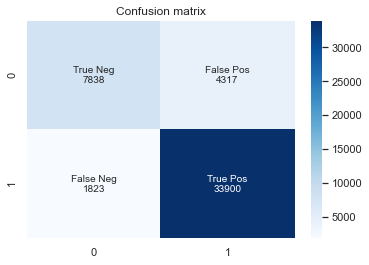

In [95]:
# ploting confusion matrix
plot_confusion_matrix(confusion_train)

#### confusion matrix for test dataset

In [96]:
# confusion matrix
confusion_test =metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_test)
# help(metrics.confusion_matrix)

[[ 2364  1642]
 [  605 11349]]


Ploting confusion matrix

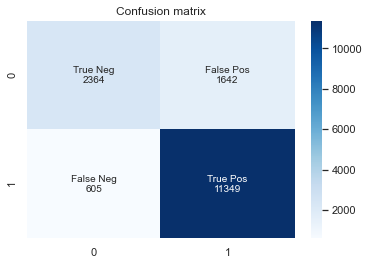

In [97]:
# ploting confusion matrix
plot_confusion_matrix(confusion_test)

#### Other Matrics - Sensitivity, Specificity, Precision,Recall and F1 score for train and test dataset

In [98]:
# for train dataset
TN_train = confusion_train[0, 0]
FP_train = confusion_train[0, 1]
FN_train = confusion_train[1, 0]
TP_train = confusion_train[1, 1]

In [99]:
# for test datset
TN_test = confusion_test[0, 0]
FP_test = confusion_test[0, 1]
FN_test = confusion_test[1, 0]
TP_test = confusion_test[1, 1]

#### Sensitivity metrics

In [100]:
sensitivity_train = TP_train / float(FN_train + TP_train)
sensitivity_test = TP_test / float(FN_test + TP_test)
print("sensitivity on train dataset",sensitivity_train)
print("sensitivity on test dataset",sensitivity_test)

sensitivity on train dataset 0.9489684516977858
sensitivity on test dataset 0.9493893257487034


#### Specificity metrics

In [101]:
specificity_train = TN_train / float(TN_train + FP_train)
specificity_test = TN_test / float(TN_test + FP_test)
print("specificity on train dataset",specificity_train)
print("specificity on train dataset",specificity_test)

specificity on train dataset 0.6448375154257507
specificity on train dataset 0.5901148277583624


#### precision metrics

In [102]:
precision_train = TP_train / float(TP_train + FP_train)
precision_test = TP_test / float(TP_test + FP_test)
print("precision on train dataset",precision_train)
print("precision on test dataset",precision_test)

precision on train dataset 0.887039799042311
precision on test dataset 0.8736048033253792


#### Recall metrics

In [103]:
print("RECALL SCORE on train dataset :", metrics.recall_score(y_train, y_pred_train))
print("RECALL SCORE on test dataset :", metrics.recall_score(y_test, y_pred_class))

RECALL SCORE on train dataset : 0.9489684516977858
RECALL SCORE on test dataset : 0.9493893257487034


#### F1 score

In [104]:
print("F1 SCORE for train dataset :",metrics.f1_score(y_train, y_pred_train))
print("F1 SCORE for test dataset :",metrics.f1_score(y_test, y_pred_class))

F1 SCORE for train dataset : 0.9169596970516635
F1 SCORE for test dataset : 0.9099218280216476


In [105]:
y_pred_class

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [106]:
y_pred_proba

array([[0.0233309 , 0.9766691 ],
       [0.00229494, 0.99770506],
       [0.06087167, 0.93912833],
       ...,
       [0.0297415 , 0.9702585 ],
       [0.3140101 , 0.6859899 ],
       [0.44534364, 0.55465636]])

### ROC curve

In [107]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [108]:
# area under the curve
print (roc_auc)

0.897386990035275


In [109]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.089008,0.004993
2,1.000000e+00,0.089092,0.004993
3,1.000000e+00,0.089928,0.004993
4,1.000000e+00,0.092103,0.004993
...,...,...,...
3247,1.043602e-32,0.999749,0.999251
3248,4.906421e-34,0.999749,0.999501
3249,1.234643e-37,0.999833,0.999501
3250,4.719023e-79,0.999833,1.000000


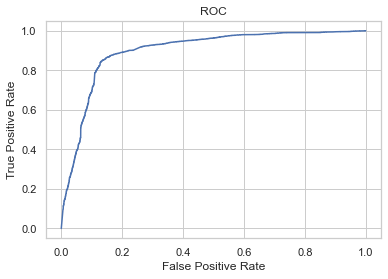

In [110]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

- We have checked sensitivity- specificity and precision-recall metrix for the model
- models accuracy,sensitivity,specificity on train and test dataset are :
    - Train dataset :accuracy(87%),sensitivity (95%),specificity(64%)
    - Test Dataset : accuracy(86%),sensitivity (95%),specificity(59%)
- models precision,recall,F1 score on train and test dataset are :
    - Train dataset :precision(88%),recall (95%),F1 score(92%)
    - Test Dataset : precision(87%),recall (95%),F1 score(91%)
    - Area under curve : 90%

- Hense we can conclude that this model is good.